In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
from datetime import date, datetime
from sqlmodel import create_engine, SQLModel
from etl.models import PowerSystem
from etl.crud import CRUD
from etl import extract

In [2]:
db_connection = os.getenv('DB_CONNECTION')
engine = create_engine(db_connection)
crud = CRUD(engine=engine, table=PowerSystem)
rows = crud.read()

In [3]:
data = pd.DataFrame(r.dict() for r in rows)

In [4]:
data.set_index('ID').head(5)

,Minutes1UTC,Minutes1DK,ProductionGe100MW,SolarPower,OffshoreWindPower,Exchange_Sum,Exchange_DK1_NL,Exchange_DK1_SE,Exchange_DK2_DE,Exchange_Bornholm_SE,CO2Emission,ProductionLt100MW,OnshoreWindPower,Exchange_DK1_DE,Exchange_DK1_NO,Exchange_DK1_DK2,Exchange_DK2_SE
ID,,,,,,,,,,,,,,,,,
0000041F-6973-42AB-927F-89FE8B775B30,2019-10-17 04:41:00,2019-10-17 06:41:00,762.320007,0.000000,516.320007,1477.459961,699.570007,52.0,599.909973,24.090000,266.200012,412.459991,530.280029,-4.210000,243.080002,-277.829987,-136.979996
000017D9-1545-4565-9CDE-514F387377F9,2020-02-20 11:31:00,2020-02-20 12:31:00,1272.180054,58.340000,1511.599976,-962.159973,-700.219971,-715.0,-523.390015,-20.290001,130.750000,581.390015,2717.830078,-164.419998,949.950012,-589.799988,211.210007
000018F6-A8E1-44FB-ACD4-83447DCC1CDC,2021-12-17 16:26:00,2021-12-17 17:26:00,2557.510010,0.410000,931.340027,-16.580000,-440.339996,3.0,-820.340027,29.110001,273.070007,887.119995,742.390015,-1445.160034,1631.150024,-467.190002,1026.000000
00002CE9-1BDD-42D4-AAC0-98BED0848457,2020-01-23 10:13:00,2020-01-23 11:13:00,1367.319946,53.290001,965.989990,524.270020,-700.119995,468.0,-584.950012,6.790000,130.160004,685.760010,1410.640015,-193.160004,873.650024,-589.719971,654.059998
00002FA8-57FC-45B9-A875-EE2236EA81A7,2021-07-08 16:12:00,2021-07-08 18:12:00,788.099976,409.450012,202.339996,2362.889893,650.599976,499.0,528.500000,27.680000,261.519989,415.329987,261.500000,-532.219971,802.299988,-326.660004,387.029999


In [5]:
aggregated_data = data.resample(
    rule='1M', 
    on='Minutes1UTC',
    label='left'
)[[
    'ProductionGe100MW',
    'ProductionLt100MW',
    'OnshoreWindPower',
    'CO2Emission',
    'SolarPower',
    'OffshoreWindPower',
]].mean()

In [6]:
cols = [
    'ProductionGe100MW',
    'ProductionLt100MW',
    'OnshoreWindPower',
    'CO2Emission',
    'SolarPower',
    'OffshoreWindPower',
]
melted_data = pd.melt(
    frame=aggregated_data.reset_index(), 
    id_vars=['Minutes1UTC'], 
    value_vars=cols,
    var_name='Type', 
    value_name='Value'
)

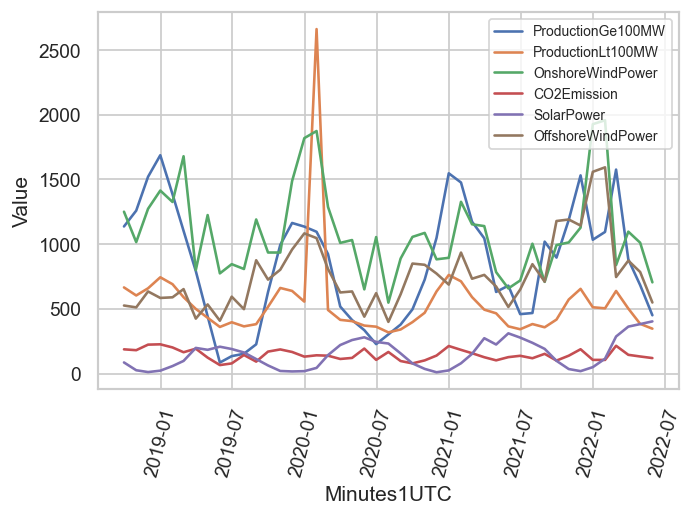

In [7]:
sns.set_theme(style='whitegrid')
fig, ax=plt.subplots(dpi=125)
sns.lineplot(
    x='Minutes1UTC', 
    y='Value', 
    hue='Type', 
    data=melted_data, 
    ax=ax
);
plt.xticks(rotation=75);
ax.legend(loc='upper right', fontsize=8);

In [8]:
production_cols = [
    'ProductionGe100MW',
    'ProductionLt100MW',
    'OnshoreWindPower',
    'SolarPower',
    'OffshoreWindPower',
]
data['TotalProduction'] = data[production_cols].sum(axis=1)

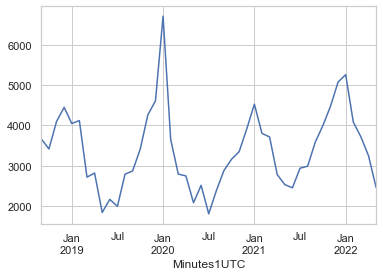

In [9]:
data.resample(
    rule='1M', 
    on='Minutes1UTC',
    label='left'
)['TotalProduction'].mean().plot();

<AxesSubplot:xlabel='Minutes1UTC', ylabel='ProductionGe100MW'>

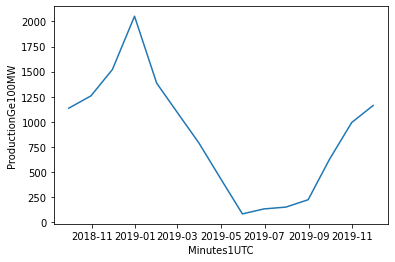

In [57]:
fig, ax=plt.subplots();
sns.lineplot(data=aggregated_data['ProductionGe100MW'], ax=ax);

In [ ]:

df = pd.DataFrame(p.dict() for p in spotprice)
df = df.loc[lambda x: x.PriceArea.isin(["DK1", "DK2"])]
df = df.reset_index()

df_day = df.groupby('PriceArea').resample(rule='1D', on='HourUTC').SpotPriceDKK.mean().reset_index()
df_month = df.groupby('PriceArea').resample(rule='1M', on='HourUTC').SpotPriceDKK.mean().reset_index()
df_month['HourUTC'] = df_month['HourUTC'].dt.strftime('%Y-%m')

fig, ax = plt.subplots()
sns.lineplot(
    x='HourUTC', 
    y='SpotPriceDKK', 
    hue='PriceArea', 
    data=df_day,
    ax=ax
)
fig, ax = plt.subplots()
sns.lineplot(
    x='HourUTC', 
    y='SpotPriceDKK', 
    hue='PriceArea', 
    data=df_month,
    ax=ax
)
plt.show()

print(df)

